In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [2]:
data = pd.read_csv("dataset/Wholesale customers data.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [5]:
fresh_q1 = 3127.75
milk_q1 = 1533
grocery_q1 = 2153
frozen_q1 = 742.25
deter_q1 = 256.75
deli_q1 = 408.25

fresh_q3 = 16933.75
milk_q3 = 7190.25
grocery_q3 = 10655.75
frozen_q3 = 3554.25
deter_q3 = 3922
deli_q3 = 1820.25

In [6]:
data[(data.Grocery > grocery_q3) & (data.Milk > milk_q3) & (data.Delicassen < deli_q1) & (data.Fresh < fresh_q1)].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
43,630,11095,23998,787,9529,72
53,491,10473,11532,744,5611,224
81,219,9540,14403,283,7818,156
109,1406,16729,28986,673,836,3
159,355,7704,14682,398,8077,303


In [7]:
data[(data.Fresh > fresh_q3) & (data.Frozen > frozen_q3) & (data.Grocery < grocery_q1)].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,56159,555,902,10002,212,2916
75,20398,1137,3,4407,3,975
126,19219,1840,1658,8195,349,483
190,16936,6250,1981,7332,118,64
237,18692,3838,593,4634,28,1215


In [8]:
data[(data.Delicassen > deli_q3) & (data.Frozen < frozen_q1) & (data.Fresh < fresh_q1)].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
106,1454,6337,10704,133,6830,1831
155,1989,10690,19460,233,11577,2153
171,200,25862,19816,651,8773,6250
189,834,11577,11522,275,4027,1856
245,3062,6154,13916,230,8933,2784


In [9]:
indices = [109, 283, 315]
samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1406,16729,28986,673,836,3
1,25767,3613,2013,10303,314,1384
2,1479,14982,11924,662,3891,3508


In [10]:
data_mean = data.describe().loc['mean',:]
samples_bar = samples.append(data_mean)
samples_bar.index = indices + ['mean']

<AxesSubplot:>

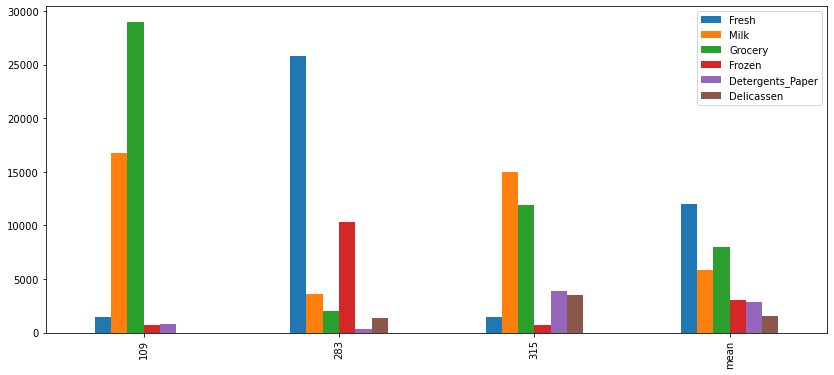

In [11]:
samples_bar.plot(kind='bar', figsize=(14,6))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
dep_vars = list(data.columns)
for var in dep_vars:
    new_data = data.drop([var], axis = 1)
    new_feature = pd.DataFrame(data.loc[:, var])
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)
    dtr = DecisionTreeRegressor(random_state=42)
    dtr.fit(X_train, y_train)
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.3857497102040739
R2 score for Milk as dependent variable: 0.15627539501732113
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicassen as dependent variable: -2.254711537203931


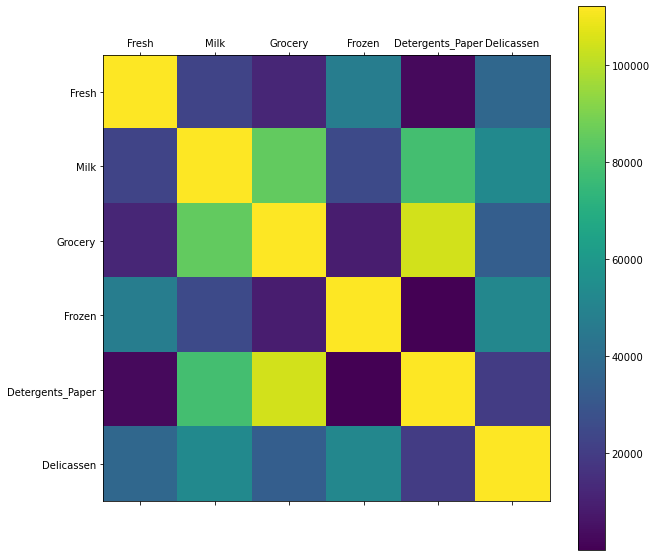

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(data)

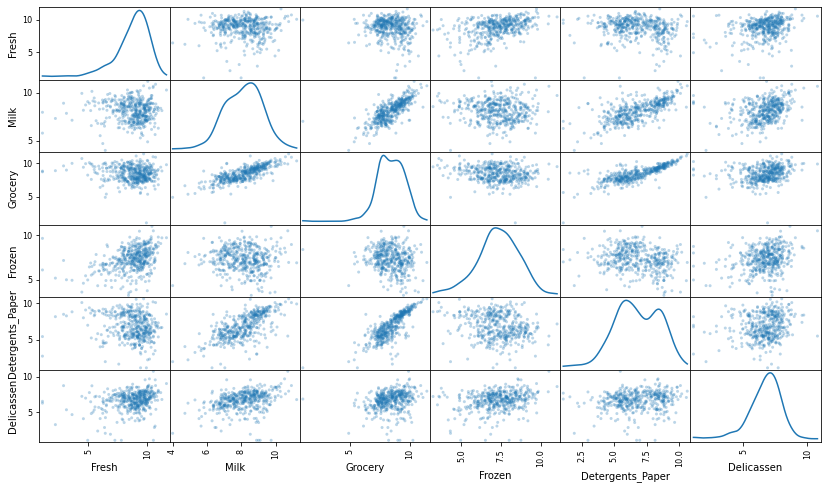

In [14]:
from pandas.plotting import scatter_matrix
log_data = np.log(data)
log_samples = np.log(samples)
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [15]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
1,10.156850,8.192294,7.607381,9.240190,5.749393,7.232733
2,7.299121,9.614605,9.386308,6.495266,8.266421,8.162801


In [16]:
from scipy import stats
idx = []
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature], 25)
    Q3 = np.percentile(log_data[feature], 75)
    step = 1.5*(Q3 - Q1)
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    idx += log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
print(sorted(idx))
outliers  = []
import collections
outliers = [item for item, count in collections.Counter(idx).items() if count > 1]
print(sorted(outliers))
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print(log_data.shape)
print(good_data.shape)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]
[65, 66, 75, 128, 154]
(440, 6)
(435, 6)


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)
pca_samples = pca.transform(log_samples)
print('\n', np.cumsum(pca.explained_variance_ratio_))


 [0.44302505 0.70681723 0.82988103 0.93109011 0.97959207 1.        ]


In [18]:
pca = PCA(n_components=2)
pca.fit(log_data)
reduced_data = pca.transform(log_data)
pca_samples = pca.transform(log_samples)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [19]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.9845,3.8525
1,1.6203,-2.1223
2,-2.7336,0.2403


In [20]:
pca = PCA(n_components=2).fit(good_data)
reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_samples)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [21]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))
print(reduced_data[:10])

,Dimension 1,Dimension 2
0,-0.9434,3.8210
1,1.6302,-2.0843
2,-2.7186,0.3198


   Dimension 1  Dimension 2
0    -1.757983     0.009711
1    -1.788665    -0.812251
2    -1.883353    -1.599135
3     1.155265    -1.405201
4    -0.784786    -2.394294
5    -1.085043    -0.324315
6    -1.128640     0.262863
7    -1.567236    -0.901014
8    -0.863567     0.664968
9    -2.873382    -0.677438


In [22]:
print('Average purchase costs for each category:')
print(data.sum() / 440)

Average purchase costs for each category:
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64
